In [1]:
%%sh
pip -q install together

In [2]:
import base64
import os
from together import Together
from IPython.display import Image

# Together.ai model identifier for Arcee AI Spotlight
model = "arcee_ai/arcee-spotlight"

# Get Together.ai API key from environment variable
TOGETHER_API_KEY = os.getenv("TOGETHER_API_KEY")
if not TOGETHER_API_KEY:
    raise ValueError("Please set the TOGETHER_API_KEY environment variable")

client = Together(api_key=TOGETHER_API_KEY)

In [3]:
from IPython.display import Markdown, clear_output, display

def print_streaming_response(response):
    num_tokens = 0
    content = ""
    for chunk in response:
        if hasattr(chunk, 'choices') and len(chunk.choices) > 0:
            if hasattr(chunk.choices[0], 'delta') and hasattr(chunk.choices[0].delta, 'content'):
                delta_content = chunk.choices[0].delta.content
                if delta_content:
                    num_tokens += 1
                    content += delta_content
                    clear_output(wait=True)
                    display(Markdown(content))
            elif hasattr(chunk.choices[0], 'message') and hasattr(chunk.choices[0].message, 'content'):
                msg_content = chunk.choices[0].message.content
                if msg_content:
                    num_tokens += 1
                    content += msg_content
                    clear_output(wait=True)
                    display(Markdown(content))

    print(f"\n\nNumber of tokens: {num_tokens}")


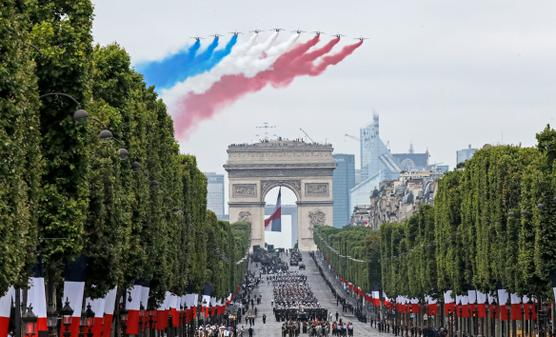

In [4]:
# Define the URL and text for our examples
url = "https://img.lemde.fr/2019/07/14/0/0/4674/2832/556/0/75/0/b095b7e_be31f6a29f404568a2e861c48fc4a078-be31f6a29f404568a2e861c48fc4a078-0.jpg"
text = "Where was this picture taken?"

# display the image
display(Image(url))

In [5]:
response = client.chat.completions.create(
    model=model,
    messages=[
        {
            "role": "user",
            "content": [
                {"type": "text", "text": text},
                {"type": "image_url", "image_url": {"url": url}},
            ],
        }
    ],
    temperature=0.9,
    stream=True,
    max_tokens=2048,
)

print_streaming_response(response)

This picture appears to have been taken in Paris, France. The prominent feature in the image is the Arc de Triomphe, which is one of the most iconic landmarks in Paris. The presence of French flags and the military parade further suggest that this could be a national holiday or a significant event in France, such as Bastille Day (July 14th), which is celebrated with military parades in Paris. The Champs-Élysées, visible on either side of the parade route, is another famous landmark in Paris known for its grandeur and historical significance.



Number of tokens: 116


In [6]:
text = "Write a short and precise caption for this picture"

response = client.chat.completions.create(
    model=model,
    messages=[
        {
            "role": "user",
            "content": [
                {"type": "text", "text": text},
                {"type": "image_url", "image_url": {"url": url}},
            ],
        }
    ],
    temperature=0.9,
    stream=True,
    max_tokens=2048,
)

print_streaming_response(response)


"Colorful jets fly over the Arc de Triomphe during a grand parade, celebrating national pride."



Number of tokens: 21


In [7]:
text = """Generate JSON metadata for this picture:
- Country
- City
- Landmarks
- Short description
- Detailed description
- Themes
- Keywords
"""

response = client.chat.completions.create(
    model=model,
    messages=[
        {
            "role": "user",
            "content": [
                {"type": "text", "text": text},
                {"type": "image_url", "image_url": {"url": url}},
            ],
        }
    ],
    temperature=0.9,
    stream=True,
    max_tokens=2048,
)

print_streaming_response(response)


Here is the JSON metadata for the picture:

```json
{
  "Country": "France",
  "City": "Paris",
  "Landmarks": ["Arc de Triomphe"],
  "Short Description": "A military parade in Paris with the Arc de Triomphe and the Patrouille de France flying overhead.",
  "Detailed Description": "The image captures a vibrant military parade in Paris, France, with the iconic Arc de Triomphe prominently featured in the background. The Champs-Élysées, lined with tall trees and French flags, serves as the parade route. In the sky, the Patrouille de France, France's aerobatic display team, is performing a flyover, leaving trails of red, white, and blue smoke that echo the colors of the French flag. The scene is filled with military personnel marching in formation, adding to the ceremonial atmosphere of the event.",
  "Themes": ["National Celebration", "Military Parade", "French Culture", "Cultural Heritage"],
  "Keywords": ["Paris", "Champs-Élysées", "Arc de Triomphe", "Patrouille de France", "Military Parade", "French Flag", "Red, White, Blue Smoke"]
}
```



Number of tokens: 253


In [8]:
def load_image_as_base64(file_path):
    # Load the image as a base64 string
    with open(file_path, "rb") as image_file:
        base64_string = base64.b64encode(image_file.read()).decode("utf-8")
    return base64_string


In [9]:
image_file = "july14th.jpg"
image_base64 = load_image_as_base64(image_file)

response = client.chat.completions.create(
    model=model,
    messages=[
        {
            "role": "user",
            "content": [
                {"type": "text", "text": text},
                {
                    "type": "image_url",
                    "image_url": {"url": f"data:image/jpeg;base64,{image_base64}"},
                },
            ],
        }
    ],
    temperature=0.9,
    stream=True,
    max_tokens=2048,
)

print_streaming_response(response)


Here is the JSON metadata for the picture:

```json
{
  "Country": "France",
  "City": "Paris",
  "Landmarks": ["Arc de Triomphe"],
  "Short Description": "A military parade in Paris with the Arc de Triomphe and the Patrouille de France flying overhead.",
  "Detailed Description": "The image captures a grand military parade in Paris, France, with the iconic Arc de Triomphe prominently featured in the background. The Champs-Élysées, lined with rows of trees and French flags, serves as the parade route. In the sky, the Patrouille de France, France's aerobatic display team, is performing a flyover, leaving trails of red, white, and blue smoke that echo the colors of the French flag. Soldiers in uniform march in formation down the avenue, adding to the ceremonial atmosphere of the event.",
  "Themes": ["National Celebration", "Military Parade", "French Culture", "Historical Landmark"],
  "Keywords": ["Paris", "Champs-Élysées", "Arc de Triomphe", "Patrouille de France", "Military Parade", "French Flag", "Red, White, Blue Smoke"]
}
```



Number of tokens: 254


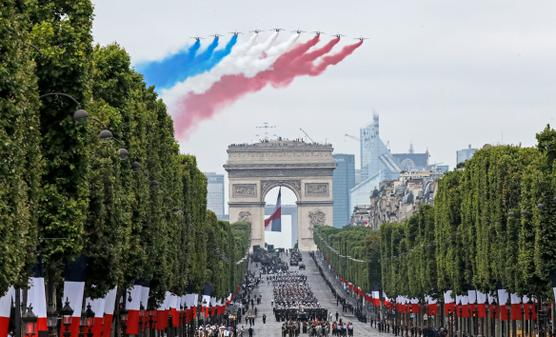

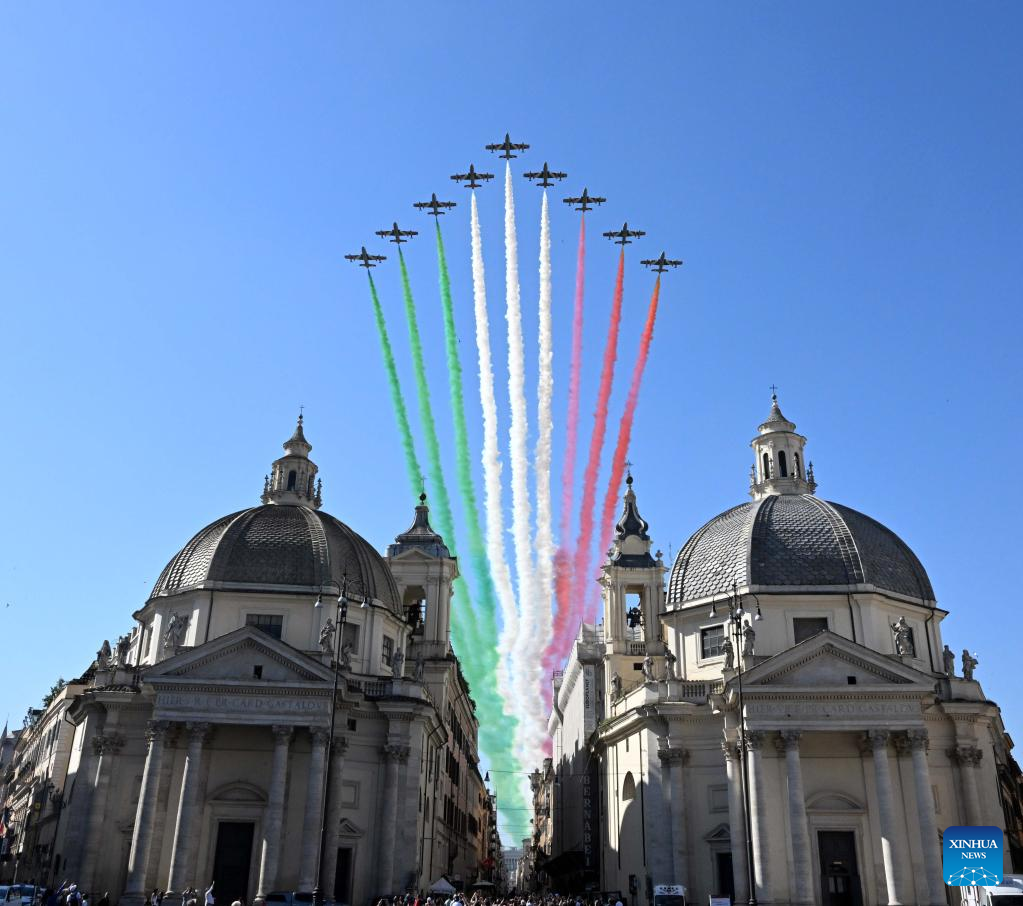

In [10]:
image1 = "july14th.jpg"
image2 = "italy.png"

# Load both images as base64
july14th_base64 = load_image_as_base64(image1)
july14th_2_base64 = load_image_as_base64(image2)

# Display both images
display(Image(image1))
print("\n")
display(Image(image2))

In [11]:
text = """Compare these two images:
- What similarities do you see?
- What differences do you notice?
- Are they from the same country or not
- What specific details support your conclusion?"""

# Create a message with both images
response = client.chat.completions.create(
    model=model,
    messages=[
        {
            "role": "user",
            "content": [
                {"type": "text", "text": text},
                {
                    "type": "image_url",
                    "image_url": {"url": f"data:image/jpeg;base64,{july14th_base64}"},
                },
                {
                    "type": "image_url",
                    "image_url": {"url": f"data:image/jpeg;base64,{july14th_2_base64}"},
                }
            ],
        }
    ],
    temperature=0.9,
    stream=True,
    max_tokens=2048,
)

print_streaming_response(response)


### Similarities:
1. **Airshow Display**: Both images feature an airshow with planes flying in formation and leaving colored smoke trails.
2. **Cultural Significance**: The presence of military personnel and ceremonial elements suggests that both events are likely part of national celebrations or military parades.
3. **Public Gathering**: There is a crowd gathered on the street, indicating public participation in the event.

### Differences:
1. **Architectural Landmarks**:
   - The first image shows the Arc de Triomphe in Paris, France, which is a well-known monument.
   - The second image features a church with domes, likely in Italy, as indicated by the architectural style and the green, white, and red smoke trails (colors of the Italian flag).
   
2. **Flags**:
   - The first image includes French flags, suggesting the event is taking place in France.
   - The second image does not prominently display any flags but the colors of the smoke trails strongly suggest it is in Italy.

3. **Street Layout**:
   - The first image shows a wide avenue lined with trees and French flags, typical of Parisian architecture.
   - The second image depicts a narrower street with a more traditional European-style building, possibly a church, with a dome and columns.

4. **Skyline**:
   - The first image has a modern skyline in the background, including skyscrapers.
   - The second image has a clear blue sky without visible modern buildings, giving it a more historical and classical feel.

### Conclusion:
The two images are not from the same country. The first image is from France, as evidenced by the Arc de Triomphe and French flags, while the second image is from Italy, as suggested by the architectural style of the church and the colors of the smoke trails (green, white, and red).



Number of tokens: 377
